In [2]:
from bisect import bisect_left
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

# FUNCTION ITSELF

In [113]:
def Temperature_Extreme_Estimiation_Function(Recent_Sub_Data,Recent_Extreme_Data,Hist_Sub_Daily, Hours_Exc_24,Hours_Inc_24, Extreme_Column_Names,Trials):
    '''
    Recent_Sub_Data:
        Sub-Daily that is used as the reference period when estimating the historical daily extremes.
        
    Recent_Extreme_Data:
        Extreme Data that is split into Maximum and Minimum Temperatures
    
    Hist_Sub_Daily:
        The sub-daily historical record that the Maximum and Minimum Temperatures will be estimated from.
    
    Hours = pd.Series([0,3,6,9,12,15,18,21,24])
    
    Extreme_Column_Names:= ['PRO Max','PRO Min']
    
    Trials:
    
    '''
    
    #PART 1 is to split the recent_sub_daily data into each hour and then combine together this is a function.
    Recent_Sub_Data_Matrix = Sub_Daily_Splitter_To_Matrix(Recent_Sub_Data)
    
    # PART 2 Combine the Max and Min with the Subdaily
    Combined_Recent_Info = pd.merge(left = Recent_Sub_Data_Matrix, right  =Recent_Extreme_Data,
                                    left_index=True,right_index=True  )
    #Now Every Single Available hour and max and min is ready to be used.
    
    #PART 3 Is to split this data into each corresponding month
    Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec =  monther_splitter(Combined_Recent_Info)
    
    #PART 4 Is to fix up the Historical Data so it is closest to the every hour hour mark where data is avaliable
    Hist_Sub_Daily_WT_Clos_Hour = Closest_Hour(Hist_Sub_Daily, Hours_Inc_24)
    
    #Part 5 Is to get each of the Month_Hour_Extreme separated for bootstrapping
    #Where we get the data from
    months_Data = [Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec]
    months_Names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    

    Dictionary_Month_Separated, Keys = Dictionary_Separation(months_Data,Hours_Exc_24,months_Names,Extreme_Column_Names)
    
    #PART 6
    #Now I need to select 600 points and trail it 1000 times for each single thing in the dictionary and label the hour 0 as hour 0 run 1]
    #and PRO Max Run 1
    Sampled_Dictionary,Keys_Sampled = Sampler_Dictionary(Dictionary_Month_Separated,Keys,Trials)
    
    #Part 7
    #Now to apply the regression anaylsis onto the data I have provide
    All_data,Key_Inner,Key_Outer = Linear_Regression_Analysis(Hours_Exc_24,Trials,Sampled_Dictionary)
    
    #Part 8
    #Now estimate each individual Sub-Daily temperature
    Uncut_Estimation_Dic,key_Hist = Total_Estimation_Sub_Daily(Trials,Hist_Sub_Daily_WT_Clos_Hour,All_data)
    
    #Part 9
    #Now to choose the best one for the trials when there are 2 or more key temperatures
    Estimated_Historical_Daily_Extremes,Hist_Proper = Final_Estimation_Extreme(Trials,Uncut_Estimation_Dic)
    
    
    return(Estimated_Historical_Daily_Extremes,Hist_Proper,Uncut_Estimation_Dic,key_Hist,All_data,Key_Inner,Key_Outer,Sampled_Dictionary,Keys_Sampled,Hist_Sub_Daily_WT_Clos_Hour,Hist_Sub_Daily_WT_Clos_Hour,Combined_Recent_Info)
    

In [114]:
def Sub_Daily_Splitter_To_Matrix(Recent_Sub_Data): 
    '''
    Recent_Sub_Data:
        Sub-Daily Data that is split into its respective hourly data which has all the information in it.
    '''
        
    PRO_Sub_0 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==0]],axis =0)
    PRO_Sub_3= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==3]],axis =0)
    PRO_Sub_6= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==6]],axis =0)
    PRO_Sub_9= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==9]],axis =0)
    PRO_Sub_12= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==12]],axis =0)
    PRO_Sub_15= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==15]],axis =0)
    PRO_Sub_18= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==18]],axis =0)
    PRO_Sub_21= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==21]],axis =0)
    PRO_Sub_1 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==1]],axis =0)
    PRO_Sub_2 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==2]],axis =0)
    PRO_Sub_4 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==4]],axis =0)
    PRO_Sub_5 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==5]],axis =0)
    PRO_Sub_7 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==7]],axis =0)
    PRO_Sub_8 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==8]],axis =0)
    PRO_Sub_10 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==10]],axis =0)
    PRO_Sub_11 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==11]],axis =0)
    PRO_Sub_13 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==13]],axis =0)
    PRO_Sub_14 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==14]],axis =0)
    PRO_Sub_16 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==16]],axis =0)
    PRO_Sub_17 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==17]],axis =0)
    PRO_Sub_19 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==19]],axis =0)
    PRO_Sub_20 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==20]],axis =0)
    PRO_Sub_22 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==22]],axis =0)
    PRO_Sub_23 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==23]],axis =0)
    
    
    
    #Now make it its own DataFrame
    PRO_Sub_0 = PRO_Sub_0.reset_index()
    PRO_Sub_0['date'] = pd.to_datetime(PRO_Sub_0['date']).dt.date
    PRO_Sub_0 = PRO_Sub_0.set_index('date')
    
    '''
    PRO_Sub_0_Max = PRO_Sub_0.shift(1,freq='D')
    PRO_Sub_1_Max = PRO_Sub_1.shift(1,freq='D')
    PRO_Sub_2_Max =PRO_Sub_2.shift(1,freq='D')
    PRO_Sub_3_Max =PRO_Sub_3.shift(1,freq='D')
    PRO_Sub_4_Max = PRO_Sub_4.shift(1,freq='D')
    PRO_Sub_5_Max =PRO_Sub_5.shift(1,freq='D')
    PRO_Sub_6_Max =PRO_Sub_6.shift(1,freq='D')
    PRO_Sub_7_Max =PRO_Sub_7.shift(1,freq='D')
    PRO_Sub_8_Max =PRO_Sub_8.shift(1,freq='D')
    
    PRO_Sub_9_Min = PRO_Sub_9.shift(-1,freq='D')
    PRO_Sub_10_Min = PRO_Sub_10.shift(1,freq='D')
    PRO_Sub_11_Min =PRO_Sub_11.shift(1,freq='D')
    PRO_Sub_12_Min =PRO_Sub_12.shift(1,freq='D')
    PRO_Sub_13_Min = PRO_Sub_13.shift(1,freq='D')
    PRO_Sub_14_Min =PRO_Sub_14.shift(1,freq='D')
    PRO_Sub_15_Min =PRO_Sub_15.shift(1,freq='D')
    PRO_Sub_16_Min =PRO_Sub_16.shift(1,freq='D')
    PRO_Sub_17_Min =PRO_Sub_17.shift(1,freq='D')
    PRO_Sub_18_Min = PRO_Sub_18.shift(1,freq='D')
    PRO_Sub_19_Min = PRO_Sub_19.shift(1,freq='D')
    PRO_Sub_20_Min =PRO_Sub_20.shift(1,freq='D')
    PRO_Sub_21_Min =PRO_Sub_21.shift(1,freq='D')
    PRO_Sub_22_Min = PRO_Sub_22.shift(1,freq='D')
    PRO_Sub_23_Min =PRO_Sub_23.shift(1,freq='D')
    '''
    
    
    
    
    
    
    
    
    
    
    
    
    PRO_Sub_1 = PRO_Sub_1.reset_index()
    PRO_Sub_1['date'] = pd.to_datetime(PRO_Sub_1['date']).dt.date
    PRO_Sub_1 = PRO_Sub_1.set_index('date')
    PRO_Sub_2 = PRO_Sub_2.reset_index()
    PRO_Sub_2['date'] = pd.to_datetime(PRO_Sub_2['date']).dt.date
    PRO_Sub_2 = PRO_Sub_2.set_index('date')
    PRO_Sub_3 = PRO_Sub_3.reset_index()
    PRO_Sub_3['date'] = pd.to_datetime(PRO_Sub_3['date']).dt.date
    PRO_Sub_3 = PRO_Sub_3.set_index('date')
    PRO_Sub_4 = PRO_Sub_4.reset_index()
    PRO_Sub_4['date'] = pd.to_datetime(PRO_Sub_4['date']).dt.date
    PRO_Sub_4 = PRO_Sub_4.set_index('date')
    PRO_Sub_5 = PRO_Sub_5.reset_index()
    PRO_Sub_5['date'] = pd.to_datetime(PRO_Sub_5['date']).dt.date
    PRO_Sub_5 = PRO_Sub_5.set_index('date')
    PRO_Sub_6 = PRO_Sub_6.reset_index()
    PRO_Sub_6['date'] = pd.to_datetime(PRO_Sub_6['date']).dt.date
    PRO_Sub_6 = PRO_Sub_6.set_index('date')
    PRO_Sub_7 = PRO_Sub_7.reset_index()
    PRO_Sub_7['date'] = pd.to_datetime(PRO_Sub_7['date']).dt.date
    PRO_Sub_7 = PRO_Sub_7.set_index('date')
    PRO_Sub_8 = PRO_Sub_8.reset_index()
    PRO_Sub_8['date'] = pd.to_datetime(PRO_Sub_8['date']).dt.date
    PRO_Sub_8 = PRO_Sub_8.set_index('date') 
    
    
    
    
    
    
    
    
    
    
    
    PRO_Sub_9 = PRO_Sub_9.reset_index()
    PRO_Sub_9['date'] = pd.to_datetime(PRO_Sub_9['date']).dt.date
    PRO_Sub_9 = PRO_Sub_9.set_index('date')
    PRO_Sub_10 = PRO_Sub_10.reset_index()
    PRO_Sub_10['date'] = pd.to_datetime(PRO_Sub_10['date']).dt.date
    PRO_Sub_10 = PRO_Sub_10.set_index('date')
    PRO_Sub_11 = PRO_Sub_11.reset_index()
    PRO_Sub_11['date'] = pd.to_datetime(PRO_Sub_11['date']).dt.date
    PRO_Sub_11 = PRO_Sub_11.set_index('date')    
    PRO_Sub_12 = PRO_Sub_12.reset_index()
    PRO_Sub_12['date'] = pd.to_datetime(PRO_Sub_12['date']).dt.date
    PRO_Sub_12 = PRO_Sub_12.set_index('date')
    PRO_Sub_13 = PRO_Sub_13.reset_index()
    PRO_Sub_13['date'] = pd.to_datetime(PRO_Sub_13['date']).dt.date
    PRO_Sub_13 = PRO_Sub_13.set_index('date')
    PRO_Sub_14 = PRO_Sub_14.reset_index()
    PRO_Sub_14['date'] = pd.to_datetime(PRO_Sub_14['date']).dt.date
    PRO_Sub_14 = PRO_Sub_14.set_index('date') 
    PRO_Sub_15 = PRO_Sub_15.reset_index()
    PRO_Sub_15['date'] = pd.to_datetime(PRO_Sub_15['date']).dt.date
    PRO_Sub_15 = PRO_Sub_15.set_index('date')
    PRO_Sub_16 = PRO_Sub_16.reset_index()
    PRO_Sub_16['date'] = pd.to_datetime(PRO_Sub_16['date']).dt.date
    PRO_Sub_16 = PRO_Sub_16.set_index('date')
    PRO_Sub_17 = PRO_Sub_17.reset_index()
    PRO_Sub_17['date'] = pd.to_datetime(PRO_Sub_17['date']).dt.date
    PRO_Sub_17 = PRO_Sub_17.set_index('date')
    PRO_Sub_18 = PRO_Sub_18.reset_index()
    PRO_Sub_18['date'] = pd.to_datetime(PRO_Sub_18['date']).dt.date
    PRO_Sub_18 = PRO_Sub_18.set_index('date')
    PRO_Sub_19 = PRO_Sub_19.reset_index()
    PRO_Sub_19['date'] = pd.to_datetime(PRO_Sub_19['date']).dt.date
    PRO_Sub_19 = PRO_Sub_19.set_index('date')
    PRO_Sub_20 = PRO_Sub_20.reset_index()
    PRO_Sub_20['date'] = pd.to_datetime(PRO_Sub_20['date']).dt.date
    PRO_Sub_20 = PRO_Sub_20.set_index('date')   
    PRO_Sub_21 = PRO_Sub_21.reset_index()
    PRO_Sub_21['date'] = pd.to_datetime(PRO_Sub_21['date']).dt.date
    PRO_Sub_21 = PRO_Sub_21.set_index('date')
    PRO_Sub_22 = PRO_Sub_22.reset_index()
    PRO_Sub_22['date'] = pd.to_datetime(PRO_Sub_22['date']).dt.date
    PRO_Sub_22 = PRO_Sub_22.set_index('date')
    PRO_Sub_23 = PRO_Sub_23.reset_index()
    PRO_Sub_23['date'] = pd.to_datetime(PRO_Sub_23['date']).dt.date
    PRO_Sub_23 = PRO_Sub_23.set_index('date')

    
    
    
    
    
    
    
    #Rename the columns
    PRO_Sub_0 = PRO_Sub_0.rename(columns={'temp':'hour 0'})
    PRO_Sub_1 = PRO_Sub_1.rename(columns={'temp':'hour 1'})
    PRO_Sub_2 = PRO_Sub_2.rename(columns={'temp':'hour 2'})
    PRO_Sub_3 = PRO_Sub_3.rename(columns={'temp':'hour 3'})
    PRO_Sub_4 = PRO_Sub_4.rename(columns={'temp':'hour 4'})
    PRO_Sub_5 = PRO_Sub_5.rename(columns={'temp':'hour 5'})
    PRO_Sub_6 = PRO_Sub_6.rename(columns={'temp':'hour 6'})
    PRO_Sub_7 = PRO_Sub_7.rename(columns={'temp':'hour 7'})
    PRO_Sub_8 = PRO_Sub_8.rename(columns={'temp':'hour 8'})
    PRO_Sub_9 = PRO_Sub_9.rename(columns={'temp':'hour 9'})
    PRO_Sub_10= PRO_Sub_10.rename(columns={'temp':'hour 10'})
    PRO_Sub_11 = PRO_Sub_11.rename(columns={'temp':'hour 11'})
    PRO_Sub_12 = PRO_Sub_12.rename(columns={'temp':'hour 12'})
    PRO_Sub_13 = PRO_Sub_13.rename(columns={'temp':'hour 13'})
    PRO_Sub_14 = PRO_Sub_14.rename(columns={'temp':'hour 14'})
    PRO_Sub_15 = PRO_Sub_15.rename(columns={'temp':'hour 15'})
    PRO_Sub_16 = PRO_Sub_16.rename(columns={'temp':'hour 16'})
    PRO_Sub_17 = PRO_Sub_17.rename(columns={'temp':'hour 17'})
    PRO_Sub_18= PRO_Sub_18.rename(columns={'temp':'hour 18'})
    PRO_Sub_19 = PRO_Sub_19.rename(columns={'temp':'hour 19'})
    PRO_Sub_20 = PRO_Sub_20.rename(columns={'temp':'hour 20'})
    PRO_Sub_21 = PRO_Sub_21.rename(columns={'temp':'hour 21'})
    PRO_Sub_22= PRO_Sub_22.rename(columns={'temp':'hour 22'})
    PRO_Sub_23 = PRO_Sub_23.rename(columns={'temp':'hour 23'})
    
    
    #Merge the data together
    #First Merge
    PR01 = pd.merge(PRO_Sub_0,PRO_Sub_1, on = ['date'], how  = 'left')
    PR23 = pd.merge(PRO_Sub_2,PRO_Sub_3, on = ['date'], how  = 'right')
    PR45 = pd.merge(PRO_Sub_4,PRO_Sub_5, on = ['date'], how  = 'right')
    PR67 = pd.merge(PRO_Sub_6,PRO_Sub_7, on = ['date'], how  = 'left')
    PR89 = pd.merge(PRO_Sub_8,PRO_Sub_9, on = ['date'], how  = 'right')
    PR1011 =pd.merge(PRO_Sub_10,PRO_Sub_11, on = ['date'], how  = 'right')
    PR1213 =pd.merge(PRO_Sub_12,PRO_Sub_13, on = ['date'], how  = 'left')
    PR1415 = pd.merge(PRO_Sub_14,PRO_Sub_15, on = ['date'], how  = 'right')
    PR1617 = pd.merge(PRO_Sub_16,PRO_Sub_17, on = ['date'], how  = 'right')
    PR1819 =pd.merge(PRO_Sub_18,PRO_Sub_19, on = ['date'], how  = 'left')
    PR2021 =pd.merge(PRO_Sub_20,PRO_Sub_21, on = ['date'], how  = 'right')
    PR2223 =pd.merge(PRO_Sub_22,PRO_Sub_23, on = ['date'], how  = 'right')

    #Second Merge
    PR0123 = pd.merge(PR01,PR23, on = ['date'], how  = 'left')
    PR4567 = pd.merge(PR45,PR67, on = ['date'], how  = 'right')
    PR891011 = pd.merge(PR89,PR1011, on = ['date'], how  = 'left')
    PR12131415 = pd.merge(PR1213,PR1415, on = ['date'], how  = 'left')
    PR16171819 = pd.merge(PR1617,PR1819, on = ['date'], how  = 'right')
    PR20212223 = pd.merge(PR2021,PR2223, on = ['date'], how  = 'left')

    #Third Merge
    PR_1 = pd.merge(PR0123,PR4567, on = ['date'], how  = 'left')
    PR_2 = pd.merge(PR891011,PR12131415, on = ['date'], how  = 'left')
    PR_3 = pd.merge(PR16171819,PR20212223, on = ['date'], how  = 'left')

    #Fourth Merge
    PR_L =  pd.merge(PR_1,PR_2, on = ['date'], how  = 'left')

    #Fifth Merge
    PR_FULL_MATRIX =  pd.merge(PR_L,PR_3, on = ['date'], how  = 'left')

    #Clean Data Up
    PR_FULL_MATRIX = PR_FULL_MATRIX.reset_index()
    PR_FULL_MATRIX['date'] = pd.to_datetime(PR_FULL_MATRIX['date'])
    PR_FULL_MATRIX = PR_FULL_MATRIX.set_index('date')

    return(PR_FULL_MATRIX)

In [115]:
# Function that splits it into each month
def monther_splitter(data): 
    '''
    data:
        The DataFrame that is in an order for each day or sub-daily time.
    
    
    '''
    #From the matrix of the recent year, it gets all the information for that month into a single matrix
    Jan = pd.concat([data[data.index.month==1],], axis = 0)
    Feb = pd.concat([data[data.index.month==2],], axis = 0)
    Mar = pd.concat([data[data.index.month==3],], axis = 0)
    Apr = pd.concat([data[data.index.month==4],], axis = 0)
    May = pd.concat([data[data.index.month==5],], axis = 0)
    Jun = pd.concat([data[data.index.month==6],], axis = 0)
    Jul = pd.concat([data[data.index.month==7],], axis = 0)
    Aug = pd.concat([data[data.index.month==8],], axis = 0)
    Sep = pd.concat([data[data.index.month==9],], axis = 0)
    Oct = pd.concat([data[data.index.month==10],], axis = 0)
    Nov = pd.concat([data[data.index.month==11],], axis = 0)
    Dec = pd.concat([data[data.index.month==12],], axis = 0)
    return(Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)

In [116]:
def Closest_Hour(Data, hours): #COMPLETED
    '''
    Data:
        Sub-Daily Data
        
        
    '''
    closest_hour= []
    
    #We want to match to the hour closest to the 3s
    

    for i in range(len(Data)):
        Individual_Day = Data.loc[i]
    
        #Extract hour
        Individual_Hour = Individual_Day['date'].hour
    
        Closest_Ind_Hour = take_closest(hours, Individual_Hour)
        closest_hour.append(Closest_Ind_Hour)
    
    #Add it as a series then combine to make it a dataframe
    CL = pd.Series(closest_hour, name = 'Closest Hour')

    Data = pd.merge(left = Data,right  =CL,left_index=True,right_index=True  )
    return(Data)

In [117]:
def take_closest(myList, myNumber): 
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    
    myList: 
        The values that the data can be closest to
    
    myNumber:
        The raw value that will then be converted to the Closest Hour
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

In [118]:
def Dictionary_Separation(months_Data,hours_Data,months_Names,Extreme_Column_Names): 
    """
    months_Data:
    
    hours_Data:
    
    months_Names:
    
    Extreme_Column_Names:
    
    
    
    Returns:
        A dictionary of data that includes being split into Month, Hour and Max or Min

    
    """
    #Where we place all the data into
    Sub_Daily_Matrix_Full_Sampled_Dic = {}
    #Wjere we place all the dictorionary titles in
    Keys = []
    for month in range(len(months_Data)):
        for hour in hours_Data:
            key1 = months_Names[month] + "_" + str(hour)+ "_" + "Mx"
            key2 = months_Names[month] + "_" + str(hour)+ "_" + "Mn"
        
            #Put It in the dictionary
            Sub_Daily_Matrix_Full_Sampled_Dic[key1] = months_Data[month][['hour {}'.format(hour), Extreme_Column_Names[0]]]
            #Drop the Nans
            Sub_Daily_Matrix_Full_Sampled_Dic[key1] = Sub_Daily_Matrix_Full_Sampled_Dic[key1].dropna(subset=['hour {}'.format(hour), Extreme_Column_Names[0]])
            
        
            Sub_Daily_Matrix_Full_Sampled_Dic[key2] = months_Data[month][['hour {}'.format(hour), Extreme_Column_Names[1]]]
            #Drop the Nans
            Sub_Daily_Matrix_Full_Sampled_Dic[key2] = Sub_Daily_Matrix_Full_Sampled_Dic[key2].dropna(subset=['hour {}'.format(hour), Extreme_Column_Names[1]])
        
            Keys.append(key1)
            Keys.append(key2)
        
    return(Sub_Daily_Matrix_Full_Sampled_Dic,Keys)

In [119]:
def Sampler_Dictionary(Dictionary_Dataset,Keys_for_Dic,Trials):
    

    #Now I need to select random samples from the length of the data we found for each month 
    #points and trail it 1000 times for each single thing in the dictionary and label the hour 0 as hour 0 run 1
    #and PRO Max Run 1


    #Get useful data ready
    Sampled_Dictionary = {}  
    Keys_Sampled = []


    #Firstly extract that part of the dictionary to be used
    for keys_used in Keys_for_Dic:
        #Extract Data
        Data = Dictionary_Dataset.get(keys_used)
    
        #The sampling
        #So we get a new dataset so it doesnt replace the original values
        #Do a single run so it appends to the RUNS and this is the samples which is the same length as the dataset used
        Run1_Data = Data.sample(n=int(len(Data)),replace=True)
        #Drop the date column
        Run1_Data = Run1_Data.reset_index(drop = True)
        #Index is 0 to 9, or 0 to Samples-1
        #Get the columns names
        Col = Run1_Data.columns
    
        #Now change column name to make it run 1 etc
        Run1_Data= Run1_Data.rename(columns={Col[0]:Col[0] + ' ' +  'run 1'})
        Run_Data= Run1_Data.rename(columns={Col[1]:Col[1] + ' ' +  'run 1'})
    

        #Now develope the for loop but the trials is based off the lenght of Data
        for rns in range(2,Trials+1):
            #This is the now the random sampling for 1000 different samples of 600 
            Individual_Run = Data.sample(n=int(len(Data)),replace=True)
            #Drop the date column
            Individual_Run = Individual_Run.reset_index(drop = True)
            #Index is 0 to 9, or 0 to Samples-1
            #Get the columns names
            Col = Individual_Run.columns
        
            #Now change column name to make it run 1 etc
            Individual_Run= Individual_Run.rename(columns={Col[0]:Col[0] + ' ' +  'run {}'.format(rns)})
            Individual_Run= Individual_Run.rename(columns={Col[1]:Col[1] + ' ' +  'run {}'.format(rns)})
        
            #Concate with RUNS
            Run_Data = pd.concat([Run_Data, Individual_Run],axis=1)
        #Now create a new dictionary that uses the name of the old dictorinary + sampling to put these runs into
    
    
    

        key = keys_used + "_" + "Sampled"
    
        #Add it in the dictionary
        Sampled_Dictionary[key] = Run_Data
    
        Keys_Sampled.append(key)
        
    return(Sampled_Dictionary,Keys_Sampled)

In [120]:
#Now develop the linear regression equation
def linear_regression_polyfit(x,y):
    #Find the linear Relationship
    A, B = np.polyfit(x, y, 1)
    #Find the correlation                  
    corr, _ = pearsonr(x, y)
    return(A,B,corr)

In [121]:
def Linear_Regression_Analysis(hour_Data,Trials,Sampled_Dictionary):


    #Get useful data ready
    Reg_Trial_Data = {}
    All_data = {}
    Key_Outer = []
    Key_Inner = []
    Month_Name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


    for month_num in range(0,12):
        #Extract the month name
        Month_Str =  Month_Name[month_num]  
        #Go by trail first
        for trial_number in range(1,Trials+1):
            #----MAX---#
            #Load each hour in for that Month
            Mxt_0 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_0_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A0,B0,corr0 = linear_regression_polyfit(Mxt_0['hour 0 run {}'.format(trial_number)],Mxt_0['PRO Max run {}'.format(trial_number)])
    
            Mxt_3 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_3_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A3,B3,corr3 = linear_regression_polyfit(Mxt_3['hour 3 run {}'.format(trial_number)],Mxt_3['PRO Max run {}'.format(trial_number)])
    
    
            Mxt_6 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_6_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A6,B6,corr6 = linear_regression_polyfit(Mxt_6['hour 6 run {}'.format(trial_number)],Mxt_6['PRO Max run {}'.format(trial_number)])
    
            Mxt_9 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_9_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A9,B9,corr9 = linear_regression_polyfit(Mxt_9['hour 9 run {}'.format(trial_number)],Mxt_9['PRO Max run {}'.format(trial_number)])
    
    
            Mxt_12 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_12_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A12,B12,corr12 = linear_regression_polyfit(Mxt_12['hour 12 run {}'.format(trial_number)],Mxt_12['PRO Max run {}'.format(trial_number)])
    
            Mxt_12 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_12_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A12,B12,corr12 = linear_regression_polyfit(Mxt_12['hour 12 run {}'.format(trial_number)],Mxt_12['PRO Max run {}'.format(trial_number)])
    
    
            Mxt_15 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_15_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A15,B15,corr15 = linear_regression_polyfit(Mxt_15['hour 15 run {}'.format(trial_number)],Mxt_15['PRO Max run {}'.format(trial_number)])
    
            Mxt_18 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_18_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A18,B18,corr18 = linear_regression_polyfit(Mxt_18['hour 18 run {}'.format(trial_number)],Mxt_18['PRO Max run {}'.format(trial_number)])
    
            Mxt_21 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_21_Mx_Sampled')
            #Function that finds A,B,corr for that trial
            A21,B21,corr21 = linear_regression_polyfit(Mxt_21['hour 21 run {}'.format(trial_number)],Mxt_21['PRO Max run {}'.format(trial_number)])
    
        
            Time = pd.Series(hour_Data,name = 'Hours') 
            A = pd.Series([A0,A3,A6,A9,A12,A15,A18,A21],name = 'A')
            B = pd.Series([B0,B3,B6,B9,B12,B15,B18,B21],name = 'B')
            corr = pd.Series([corr0,corr3,corr6,corr9,corr12,corr15,corr18,corr21],name = 'CORR')
            Items = pd.concat([Time,A,B,corr],axis = 1)
    
    
            key1 =  "{}".format(Month_Str) + "_" + 'Trial'+ "_" + str(trial_number) + "_" + "Mx"
            Reg_Trial_Data[key1] = Items
    
            Key_Inner.append(key1)
    
    
            #---MIN---#
            Mnt_0 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_0_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C0,D0,corrn0 = linear_regression_polyfit(Mnt_0['hour 0 run {}'.format(trial_number)],Mnt_0['PRO Min run {}'.format(trial_number)])
    
            Mnt_3 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_3_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C3,D3,corrn3 = linear_regression_polyfit(Mnt_3['hour 3 run {}'.format(trial_number)],Mnt_3['PRO Min run {}'.format(trial_number)])
    
    
            Mnt_6 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_6_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C6,D6,corrn6 = linear_regression_polyfit(Mnt_6['hour 6 run {}'.format(trial_number)],Mnt_6['PRO Min run {}'.format(trial_number)])
    
            Mnt_9 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_9_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C9,D9,corrn9 = linear_regression_polyfit(Mnt_9['hour 9 run {}'.format(trial_number)],Mnt_9['PRO Min run {}'.format(trial_number)])
    
    
            Mnt_12 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_12_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C12,D12,corrn12 = linear_regression_polyfit(Mnt_12['hour 12 run {}'.format(trial_number)],Mnt_12['PRO Min run {}'.format(trial_number)])
    
            Mnt_12 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_12_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C12,D12,corrn12 = linear_regression_polyfit(Mnt_12['hour 12 run {}'.format(trial_number)],Mnt_12['PRO Min run {}'.format(trial_number)])
    
    
            Mnt_15 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_15_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C15,D15,corrn15 = linear_regression_polyfit(Mnt_15['hour 15 run {}'.format(trial_number)],Mnt_15['PRO Min run {}'.format(trial_number)])
    
            Mnt_18 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_18_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C18,D18,corrn18 = linear_regression_polyfit(Mnt_18['hour 18 run {}'.format(trial_number)],Mnt_18['PRO Min run {}'.format(trial_number)])
    
            Mnt_21 = Sampled_Dictionary.get('{}'.format(Month_Str)+'_21_Mn_Sampled')
            #Function that finds A,B,corr for that trial
            C21,D21,corrn21 = linear_regression_polyfit(Mnt_21['hour 21 run {}'.format(trial_number)],Mnt_21['PRO Min run {}'.format(trial_number)])
    
        
            Time = pd.Series(hour_Data,name = 'Hours') 
            C = pd.Series([C0,C3,C6,C9,C12,C15,C18,C21],name = 'A')
            D = pd.Series([D0,D3,D6,D9,D12,D15,D18,D21],name = 'B')
            corrn = pd.Series([corrn0,corrn3,corrn6,corrn9,corrn12,corrn15,corrn18,corrn21],name = 'CORR')
            Items2 = pd.concat([Time,C,D,corrn],axis = 1)
    
    
            key2 =  "{}".format(Month_Str) + "_" + 'Trial'+ "_" + str(trial_number) + "_" + "Mn"
            Reg_Trial_Data[key2] = Items2
            Key_Inner.append(key2)
        
        key3 =  "{}".format(Month_Str) 
        All_data[key3] = Reg_Trial_Data
        Key_Outer.append(key3)
        
        
    return(All_data,Key_Inner,Key_Outer)

In [122]:
def Total_Estimation_Sub_Daily(Trials,Historical_Dataset,Data_For_Est):
    #The final stage is to build the estimation checker etc
    #What we have is
    Uncut_Estimation_Dic = {}
    
    for trialing in range(1,Trials+1):
        #All the saved information
        Estimated_Max = []
        Estimated_Min = []
        Max_T_Correlation = []
        Min_T_Correlation = []

        
        #Now lets go into the index of each individual vlaue
        for indexed in range(len(Historical_Dataset)):
            #Extract the particular day of focus
            Hist_Day = Historical_Dataset.loc[indexed]
            
            #Extract hour, month and temp
            Month_Extractor = Hist_Day['date'].month
            Hour = Hist_Day['Closest Hour']
            Temp = Hist_Day['temp']
            #Estimation funcion
            Est_Max, Est_Min, Correlation_Max, Correlation_Min = estimation_ind_day_function(Month_Extractor, Hour,
                                                                                         Temp, Data_For_Est, trialing)
            Estimated_Max.append(Est_Max)
            Estimated_Min.append(Est_Min)
            Max_T_Correlation.append(Correlation_Max)
            Min_T_Correlation.append(Correlation_Min)
        
           
        #Add to the historical period
        Estimated_Max = pd.Series(Estimated_Max,name = 'Max Temp Estimation')
        Estimated_Min = pd.Series(Estimated_Min,name = 'Min Temp Estimation')
        Max_T_Correlation = pd.Series(Max_T_Correlation,name = 'Correlation Max T')
        Min_T_Correlation = pd.Series(Min_T_Correlation,name = 'Correlation Min T')
        Dataset = pd.concat([Historical_Dataset, Estimated_Max,Estimated_Min,Max_T_Correlation,Min_T_Correlation],axis=1)

        #Add to a dictionary
    
        key_Hist = 'Trial'+ "_" + str(trialing)
        Uncut_Estimation_Dic[key_Hist] = Dataset
    return(Uncut_Estimation_Dic,key_Hist)

In [123]:
def estimation_ind_day_function(MONTH, Hour, Temp, DATA_4_EST, Trial_Number):
    if (MONTH == 1):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
            
        #Estimate Max
        Information_Max = DATA_4_EST.get('Jan').get('Jan_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Jan').get('Jan_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
        
    elif (MONTH == 2):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
    
    
        #Estimate Max
        Information_Max = DATA_4_EST.get('Feb').get('Feb_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Feb').get('Feb_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    
    elif (MONTH == 3):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
    
        #Estimate Max
        Information_Max = DATA_4_EST.get('Mar').get('Mar_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Mar').get('Mar_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    elif (MONTH == 4):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
    
        #Estimate Max
        
        Information_Max = DATA_4_EST.get('Apr').get('Apr_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Apr').get('Apr_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    elif (MONTH == 5):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
    
        #Estimate Max
        Information_Max = DATA_4_EST.get('May').get('May_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('May').get('May_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    elif (MONTH == 6):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Jun').get('Jun_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Jun').get('Jun_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    elif (MONTH == 7):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Jul').get('Jul_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Jul').get('Jul_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
        
    elif (MONTH == 8):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Aug').get('Aug_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Aug').get('Aug_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
    
    elif (MONTH == 9):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Sep').get('Sep_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Sep').get('Sep_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
        
    elif (MONTH == 10):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Oct').get('Oct_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Oct').get('Oct_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
    
    elif (MONTH == 11):
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
        #Estimate Max
        Information_Max = DATA_4_EST.get('Nov').get('Nov_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Nov').get('Nov_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
    
    else:
        #Find Index Closest to Hour
        Index_Found = np.divide(Hour,3)
        if (Index_Found == 8):
            Index_Found = 0
        else:
            Index_Found = Index_Found
            
            
        #Estimate Max
        Information_Max = DATA_4_EST.get('Dec').get('Dec_Trial_{}_Mx'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Max = Information_Max['A']*Temp + (Information_Max['B'])
        Correlation_Max =  Information_Max['CORR']
    
        #Estimate Min
        Information_Min = DATA_4_EST.get('Dec').get('Dec_Trial_{}_Mn'.format(Trial_Number)).loc[int(Index_Found)]
        Est_Min = Information_Min['A']*Temp + (Information_Min['B'])
        Correlation_Min =  Information_Min['CORR']
        
    return(Est_Max,Est_Min,Correlation_Max,Correlation_Min)

In [124]:
def Final_Estimation_Extreme(Trials,Data):
    #Create_Dictionary
    Estimated_Historical_Daily_Extremes = {}
    key_hist =  []
    #Start by going into individual trials
    for ind_trial in range(1,Trials+1):
        #Extract the dictionary that is for the trial
        Sing_Hist_Est = Data.get('Trial_{}'.format(ind_trial))
        #go through each day and get th best one for that day
        # Remove the duplicates out of the day it will make it easier for the for loop trust.
        #Get the individual columns for the dates
        Sing_Hist_Est['Day'] = Sing_Hist_Est['date'].dt.day
        Sing_Hist_Est['Month'] = Sing_Hist_Est['date'].dt.month
        Sing_Hist_Est['Year'] = Sing_Hist_Est['date'].dt.year
        Estimation_Date = Sing_Hist_Est[['date','Year','Month','Day']]
        #Combine together as it removes hourly out of the datetime
        Estimation_Date['Undup Dates']=pd.to_datetime(Estimation_Date[['Year','Month','Day']])
        #Delete all other column remove dups reset index for looping, keep the undup dates and sub cats as well.
        Estimation_Date = Estimation_Date.drop_duplicates(subset=['Undup Dates'])
        del Estimation_Date['date']
        Estimation_Date = Estimation_Date.reset_index(drop = True)
        
        #The dataclean up is ready nn
        Sing_Hist_Est = Sing_Hist_Est.set_index('date')
        #Now we have to go through each individual day, check whether there is two or more values. So this is the first check
        Max_Estimated = []
        Max_CORR_Estimated = []
        Min_Estimated = []
        Min_CORR_Estimated = []
        Dates = []
        for i in range(len(Estimation_Date)):
            #Get the individual date
            located_date = Sing_Hist_Est.loc['{}-{}-{}'.format(Estimation_Date['Year'][i],Estimation_Date['Month'][i],Estimation_Date['Day'][i])]
            located_date = located_date.reset_index()
            
            
            #From here
            Estimated_Max,Estimated_Min,Correlation_Max,Correlation_Min =  estimation_single_date_temp_Complex(located_date)
            Max_Estimated.append(Estimated_Max)
            Max_CORR_Estimated.append(Correlation_Max)
            Min_Estimated.append(Estimated_Min)
            Min_CORR_Estimated.append(Correlation_Min)
         
        Max_Estimated = pd.Series(Max_Estimated,name = 'Max Temp Estimation')
        Min_Estimated = pd.Series(Min_Estimated,name = 'Min Temp Estimation')
        Max_CORR_Estimated = pd.Series(Max_CORR_Estimated,name = 'Correlation Max T')
        Min_CORR_Estimated = pd.Series(Min_CORR_Estimated,name = 'Correlation Min T')
        Estimated_Temp = pd.concat([Estimation_Date['Undup Dates'], Max_Estimated,Min_Estimated,Max_CORR_Estimated,Min_CORR_Estimated],axis=1)
        Estimated_Temp = Estimated_Temp.rename(columns={'Undup Dates':'Date'})
        #Add to a dictionary
    
        key_Hist_Proper = 'Trial'+ "_" + str(ind_trial)
        Estimated_Historical_Daily_Extremes[key_Hist_Proper] = Estimated_Temp
        key_hist.append(key_Hist_Proper)
    return(Estimated_Historical_Daily_Extremes,key_hist)

In [125]:
def estimation_single_date_temp_Complex(data):
      
    #Single Case: Most simple
    if (len(data) == 1):
        #This finds the values required for a length of 1 data
        Estimated_Max = data['Max Temp Estimation'].loc[0]
        Estimated_Min = data['Min Temp Estimation'].loc[0]
        Correlation_Max = data['Correlation Max T'].loc[0]
        Correlation_Min = data['Correlation Min T'].loc[0]


    elif (len(data) == 2):
        #--------- MAX ------------#
        #Doing something more complicated
        #First lets find the max of the correlation for the max and min
    
        #Now for 2 ind
        #First we choose the highest correlation as the initial condition
        Mx_o_Mx_Corr = data.loc[data['Correlation Max T'] == data['Correlation Max T'].max()]
        Mx_o_Mx_Corr = Mx_o_Mx_Corr.reset_index(drop = True)
    
        #Now we want to compare this Max temp Est to the max observed twmp of that day
        Mx_o_Mx_Obs_Temp = data.loc[data['temp'] == data['temp'].max()]
        Mx_o_Mx_Obs_Temp = Mx_o_Mx_Obs_Temp.reset_index(drop = True)
    
        #Check if Est is greater or equal to the Obs, this is to ensure that the highest correlation is kept
        if (Mx_o_Mx_Corr['Max Temp Estimation'].loc[0] >= Mx_o_Mx_Obs_Temp['temp'].loc[0]):
            Estimated_Max = Mx_o_Mx_Corr['Max Temp Estimation'].loc[0]
            Correlation_Max = Mx_o_Mx_Corr['Correlation Max T'].loc[0]
        else:
            Estimated_Max = Mx_o_Mx_Obs_Temp['Max Temp Estimation'].loc[0]
            Correlation_Max = Mx_o_Mx_Obs_Temp['Correlation Max T'].loc[0]
        
         #--------- MIN ------------#
        #Doing something more complicated
        #First lets find the max of the correlation for the max and min
    
        #nOW FOR TWO INDICES
        #First we choose the highest correlation as the initial condition
        Mx_o_Mn_Corr = data.loc[data['Correlation Min T'] == data['Correlation Min T'].max()]
        Mx_o_Mn_Corr = Mx_o_Mn_Corr.reset_index(drop = True)
    
        #Now we want to compare this Max temp Est to the max observed twmp of that day
        Mn_o_Mn_Obs_Temp = data.loc[data['temp'] == data['temp'].min()]
        Mn_o_Mn_Obs_Temp = Mn_o_Mn_Obs_Temp.reset_index(drop = True)
    
        #Check if Est is greater or equal to the Obs, this is to ensure that the highest correlation is kept
        if (Mx_o_Mn_Corr['Min Temp Estimation'].loc[0] <= Mn_o_Mn_Obs_Temp['temp'].loc[0]):
            Estimated_Min = Mx_o_Mn_Corr['Min Temp Estimation'].loc[0]
            Correlation_Min = Mx_o_Mn_Corr['Correlation Min T'].loc[0]
        else:
            Estimated_Min = Mn_o_Mn_Obs_Temp['Min Temp Estimation'].loc[0]
            Correlation_Min = Mn_o_Mn_Obs_Temp['Correlation Min T'].loc[0]
    
    else:
        #Doing something more complicated
    
        #------------------MAX-------------#
        #The first check is the highest correlation
    
    
        #First we choose the highest correlation as the initial condition
        Mx_o_Mx_Corr = data.loc[data['Correlation Max T'] == data['Correlation Max T'].max()]
        Mx_o_Mx_Corr = Mx_o_Mx_Corr.reset_index(drop = True)
    
        #Now we want to compare this Max temp Est to the max observed twmp of that day
        Mx_o_Mx_Obs_Temp = data.loc[data['temp'] == data['temp'].max()]
        Mx_o_Mx_Obs_Temp = Mx_o_Mx_Obs_Temp.reset_index(drop = True)
    
        #If proves that the highest correlation est is the highest value above any of the other obs temps
        #We can keep it if not
        if (Mx_o_Mx_Corr['Max Temp Estimation'].loc[0] >= Mx_o_Mx_Obs_Temp['temp'].loc[0]):
    
            Estimated_Max = Mx_o_Mx_Corr['Max Temp Estimation'].loc[0]
            Correlation_Max = Mx_o_Mx_Corr['Correlation Max T'].loc[0]
        
        
        else:
            #Now to see if the Est of the observed is the biggest estimation
            Mx_o_Mx_Est = data.loc[data['Max Temp Estimation'] == data['Max Temp Estimation'].max()]
            Mx_o_Mx_Est = Mx_o_Mx_Corr.reset_index(drop = True)
    
            #if it is keep this value as we know the max is the greatest that day
            if (Mx_o_Mx_Est['Max Temp Estimation'].loc[0] <= Mx_o_Mx_Obs_Temp['Max Temp Estimation'].loc[0]):
                Estimated_Max = Mx_o_Mx_Obs_Temp['Max Temp Estimation'].loc[0]
                Correlation_Max = Mx_o_Mx_Obs_Temp['Correlation Max T'].loc[0]
            
            else:
                #Now we need to check the correlation as the greater correlation will be the one to take hold, we want obs
                #To have the higher correlation first
                if (Mx_o_Mx_Obs_Temp['Correlation Max T'].loc[0] >= Mx_o_Mx_Est['Correlation Max T'].loc[0]):
                    Estimated_Max = Mx_o_Mx_Obs_Temp['Max Temp Estimation'].loc[0]
                    Correlation_Max = Mx_o_Mx_Obs_Temp['Correlation Max T'].loc[0]
                else:
                    Estimated_Max = Mx_o_Mx_Est['Max Temp Estimation'].loc[0]
                    Correlation_Max = Mx_o_Mx_Est['Correlation Max T'].loc[0]
    
         #------------------MIN-------------#
        #The first check is the highest correlation
    
    
        #First we choose the highest correlation as the initial condition
        Mx_o_Mn_Corr = data.loc[data['Correlation Min T'] == data['Correlation Min T'].max()]
        Mx_o_Mn_Corr = Mx_o_Mn_Corr.reset_index(drop = True)
    
        #Now we want to compare this Min temp Est to the min observed twmp of that day
        Mn_o_Mn_Obs_Temp = data.loc[data['temp'] == data['temp'].min()]
        Mn_o_Mn_Obs_Temp = Mn_o_Mn_Obs_Temp.reset_index(drop = True)
    
        #If proves that the highest correlation est is the highest value above any of the other obs temps
        #We can keep it if not
        if (Mx_o_Mn_Corr['Min Temp Estimation'].loc[0] <= Mn_o_Mn_Obs_Temp['temp'].loc[0]):
    
            Estimated_Min = Mx_o_Mn_Corr['Min Temp Estimation'].loc[0]
            Correlation_Min = Mx_o_Mn_Corr['Correlation Min T'].loc[0]
        
        
        else:
            #Now to see if the Est of the observed is the biggest estimation
            Mn_o_Mn_Est = data.loc[data['Min Temp Estimation'] == data['Min Temp Estimation'].min()]
            Mn_o_Mn_Est = Mx_o_Mn_Corr.reset_index(drop = True)
    
            #if it is keep this value as we know the max is the greatest that day
            if (Mn_o_Mn_Est['Min Temp Estimation'].loc[0] >= Mn_o_Mn_Obs_Temp['Min Temp Estimation'].loc[0]):
                Estimated_Min = Mn_o_Mn_Obs_Temp['Min Temp Estimation'].loc[0]
                Correlation_Min = Mn_o_Mn_Obs_Temp['Correlation Min T'].loc[0]
            
            else:
                #Now we need to check the correlation as the greater correlation will be the one to take hold, we want obs
                #To have the higher correlation first
                if (Mn_o_Mn_Obs_Temp['Correlation Min T'].loc[0] >= Mn_o_Mn_Est['Correlation Min T'].loc[0]):
                    Estimated_Min = Mn_o_Mn_Obs_Temp['Min Temp Estimation'].loc[0]
                    Correlation_Min = Mn_o_Mn_Obs_Temp['Correlation Min T'].loc[0]
                else:
                    Estimated_Min = Mn_o_Mn_Est['Min Temp Estimation'].loc[0]
                    Correlation_Min = Mn_o_Mn_Est['Correlation Min T'].loc[0]
    
    return(Estimated_Max,Estimated_Min,Correlation_Max,Correlation_Min)
    

In [126]:
def estimation_single_date_temp_Simple(data):
  
    #Single Case: Most simple
    if (len(data) == 1):
        #This finds the values required for a length of 1 data
        Estimated_Max = data['Max Temp Estimation'].loc[0]
        Estimated_Min = data['Min Temp Estimation'].loc[0]
        Correlation_Max = data['Correlation Max T'].loc[0]
        Correlation_Min = data['Correlation Min T'].loc[0]


    else:
        #--------- MAX ------------#
        #Doing something more complicated
        #First lets find the max of the correlation for the max and min
    
        #nOW FOR TWO INDICES
        #First we choose the highest correlation as the initial condition
        Mx_o_Mx_Corr = data.loc[data['Correlation Max T'] == data['Correlation Max T'].max()]
        Mx_o_Mx_Corr = Mx_o_Mx_Corr.reset_index(drop = True)
        Estimated_Max = Mx_o_Mx_Corr['Max Temp Estimation'].loc[0]
        Correlation_Max = Mx_o_Mx_Corr['Correlation Max T'].loc[0]
    
    
         #--------- MIN ------------#
        #Doing something more complicated
        #First lets find the max of the correlation for the max and min
    
        #nOW FOR TWO INDICES
        #First we choose the highest correlation as the initial condition
        Mx_o_Mn_Corr = data.loc[data['Correlation Min T'] == data['Correlation Min T'].max()]
        Mx_o_Mn_Corr = Mx_o_Mn_Corr.reset_index(drop = True)
    
   
        Estimated_Min = Mx_o_Mn_Corr['Min Temp Estimation'].loc[0]
        Correlation_Min = Mx_o_Mn_Corr['Correlation Min T'].loc[0]
        
        
    return(Estimated_Max,Estimated_Min,Correlation_Max,Correlation_Min)

# Actual Data

In [3]:
P_Gardens = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_1880-1900.csv")
P_Gardens_Corr = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthgardens_daily_corrected_1880-1900.csv")

#Now we need to go back in time and minus 200 years off the date
#Convert To Datetime

P_Gardens['time'] = pd.to_datetime(P_Gardens['time'],format="%d/%m/%Y")
P_Gardens_Corr['time'] = pd.to_datetime(P_Gardens_Corr['time'],format="%d/%m/%Y")

#Split the Year up

P_Gardens = HW_Func.Date_Splitter(P_Gardens,'time',single= True)
P_Gardens_Corr = HW_Func.Date_Splitter(P_Gardens_Corr,'time',single= True)
P_Gardens['year'] = P_Gardens['year']-200
P_Gardens_Corr['year'] = P_Gardens_Corr['year']-200
#Combine in same format as ACORN-SAT

cols=["year","month","day"]
P_Gardens['date'] = P_Gardens[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
P_Gardens_Corr['date'] = P_Gardens_Corr[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

del P_Gardens['time']
del P_Gardens_Corr['time']
del P_Gardens['year']
del P_Gardens_Corr['year']
del P_Gardens['month']
del P_Gardens_Corr['month']
del P_Gardens['day']
del P_Gardens_Corr['day']

P_Gardens['date'] = pd.to_datetime(P_Gardens['date'],format="%Y/%m/%d")
P_Gardens_Corr['date'] = pd.to_datetime(P_Gardens_Corr['date'],format="%Y/%m/%d")

#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmax.009021.daily (3).csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\UPDATED TMAX, TMIN ACORN-SAT\tmin.009021.daily (2).csv").drop(0)
#Ave Temp
AvgT_Perth = (MaxT_Perth['maximum temperature (degC)']+MinT_Perth['minimum temperature (degC)'])/2

Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")
Average = pd.Series(AvgT_Perth,name="Avg")

#The Daily Max Min Ave Data
ACORN_SAT = pd.concat([MaxT_Perth['date'],Maximum,Minimum,Average],axis=1)
ACORN_SAT['date'] = pd.to_datetime(ACORN_SAT['date'],format="%Y/%m/%d")



#Now load in and fix Perth Gardens 1830-1875
Per_Gard = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\swanriver_subdaily_1830-1875.csv")
Per_Gard
#Set Datetime
Per_Gard['date'] = pd.to_datetime(Per_Gard['date'],dayfirst = True)
    

#So this works, now we need to expand this into a for loop and make this a new dataframe to be added onto
#the historical time because it will make things easier



#Can't set index yet.
#Perth Regional Office 1967 to 1992 sub daily dataset
PRO_Sub = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\perthregionaloffice_subdaily_1942-1992.csv")

PRO_Sub['date'] = pd.to_datetime(PRO_Sub['date'],dayfirst = True)
PRO_Sub = PRO_Sub.set_index('date')
PRO_Sub =PRO_Sub['temp']/10 

PRO_Sub_ES  = PRO_Sub.loc['1967':'1992']
PRO_Sub_ES =PRO_Sub_ES

## Perth Regional Office Daily Extreme Dataset
#Load PRO in
#BOM PERTH REGIONAL OFFICE
MaxT_PRO = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0010_009034_1800_Data.csv")
MinT_PRO = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\IDCJAC0011_009034_1800_Data.csv")

#Clean The data
MaxT_PRO['Datetime']= pd.to_datetime(MaxT_PRO[['Year', 'Month', 'Day']])
MinT_PRO['Datetime']= pd.to_datetime(MinT_PRO[['Year', 'Month', 'Day']])

#Delete irrelevent columns
del MaxT_PRO['Product code']
del MaxT_PRO['Bureau of Meteorology station number']
del MaxT_PRO['Year']
del MaxT_PRO['Month']
del MaxT_PRO['Day']
del MaxT_PRO['Days of accumulation of maximum temperature']
del MaxT_PRO['Quality']
del MinT_PRO['Product code']
del MinT_PRO['Bureau of Meteorology station number']
del MinT_PRO['Year']
del MinT_PRO['Month']
del MinT_PRO['Day']
del MinT_PRO['Days of accumulation of minimum temperature']
del MinT_PRO['Quality']

#Change the column name to date
MaxT_PRO= MaxT_PRO.rename(columns={'Datetime':'date'})
MinT_PRO= MinT_PRO.rename(columns={'Datetime':'date'})


#Change the column names
MaxT_PRO= MaxT_PRO.rename(columns={'Maximum temperature (Degree C)':'PRO Max'})
MinT_PRO= MinT_PRO.rename(columns={'Minimum temperature (Degree C)':'PRO Min'})

#Now concat it
MaxT_PRO= MaxT_PRO.set_index('date')
MinT_PRO= MinT_PRO.set_index('date')

PRO_DE = pd.merge(left = MaxT_PRO,right  =MinT_PRO,left_index=True,right_index=True  )


In [ ]:
Estimated_Historical_Daily_Extremes,Hist_Proper,Uncut_Estimation_Dic,key_Hist,All_data,Key_Inner,Key_Outer,Sampled_Dictionary,Keys_Sampled,Hist_Sub_Daily_WT_Clos_Hour,Hist_Sub_Daily_WT_Clos_Hour,Combined_Recent_Info= Temperature_Extreme_Estimiation_Function(Recent_Sub_Data= PRO_Sub_ES,
                                         Recent_Extreme_Data = PRO_DE,
                                         Hist_Sub_Daily = Per_Gard, 
                                         Hours_Exc_24= pd.Series([0,3,6,9,12,15,18,21]),
                                         Hours_Inc_24= pd.Series([0,3,6,9,12,15,18,21,24]), 
                                         Extreme_Column_Names =  ['PRO Max','PRO Min'],
                                         Trials = 5)

In [ ]:
#Now the function is complete lets fix this and compare to the recent
PRO_Subo = PRO_Sub.reset_index()
PRO_EXT_COMP,KEYS,Uncut_Estimation_Dic_2,key_Hist_2,All_data_2,Key_Inner_2,Key_Outer_2,Sampled_Dictionary_2,Keys_Sampled_2,Hist_Sub_Daily_WT_Clos_Hour,Hist_Sub_Daily_WT_Clos_Hour,Combined_Recent_Info= Temperature_Extreme_Estimiation_Function(Recent_Sub_Data= PRO_Sub_ES,
                                         Recent_Extreme_Data = PRO_DE,
                                         Hist_Sub_Daily = PRO_Subo, 
                                         Hours_Exc_24= pd.Series([0,3,6,9,12,15,18,21]),
                                         Hours_Inc_24= pd.Series([0,3,6,9,12,15,18,21,24]), 
                                         Extreme_Column_Names =  ['PRO Max','PRO Min'],
                                         Trials = 5)

## Lets plot some stuff

In [ ]:
#Data we have
Estimated_Historical_Daily_Extremes.get('Trial_1')

In [140]:
PRO_EXT_COMP.get('Trial_1')

,Date,Max Temp Estimation,Min Temp Estimation,Correlation Max T,Correlation Min T
0,1942-01-01,28.226500,18.312150,0.957520,0.855468
1,1942-01-02,27.414915,16.673544,0.957520,0.584816
2,1942-01-03,25.081608,15.689817,0.957520,0.855468
3,1942-01-04,28.530845,16.345400,0.957520,0.855468
4,1942-01-05,35.327870,21.371539,0.957520,0.855468
...,...,...,...,...,...
18378,1992-04-26,26.117920,18.691181,0.941232,0.876590
18379,1992-04-27,22.805367,16.120129,0.941232,0.876590
18380,1992-04-28,24.035744,14.435648,0.941232,0.876590
18381,1992-04-29,24.319677,15.854159,0.941232,0.876590


In [141]:
PRO_DE

,PRO Max,PRO Min
date,,
1897-01-01,30.6,19.4
1897-01-02,29.4,17.8
1897-01-03,27.8,18.3
1897-01-04,31.7,14.4
1897-01-05,36.7,16.1
...,...,...
1992-04-25,29.6,15.7
1992-04-26,30.0,19.5
1992-04-27,22.4,15.7


In [142]:
ACORN_SAT

,date,Max,Min,Avg
1,1910-01-01,26.7,16.4,21.55
2,1910-01-02,27.0,13.5,20.25
3,1910-01-03,27.5,12.0,19.75
4,1910-01-04,24.0,13.5,18.75
5,1910-01-05,24.8,9.8,17.30
...,...,...,...,...
40904,2021-12-27,40.6,26.3,33.45
40905,2021-12-28,41.5,23.9,32.70
40906,2021-12-29,39.5,18.4,28.95
40907,2021-12-30,34.2,17.7,25.95


In [143]:
P_Gardens

,tmax,tmin,date
0,39.444444,25.777778,1880-1-1
1,41.333333,23.444444,1880-1-2
2,41.388889,21.111111,1880-1-3
3,41.666667,21.722222,1880-1-4
4,40.000000,18.888889,1880-1-5
...,...,...,...
7665,27.777778,14.333333,1900-12-27
7666,27.666667,16.277778,1900-12-28
7667,26.944444,17.777778,1900-12-29
7668,23.555556,14.166667,1900-12-30


In [144]:
P_Gardens_Corr

,tmax,tmin,date
0,38.494444,26.093889,1880-1-1
1,40.383333,23.760556,1880-1-2
2,40.438889,21.427222,1880-1-3
3,40.716667,22.038333,1880-1-4
4,39.050000,19.048269,1880-1-5
...,...,...,...
7665,25.800000,14.300000,1900-12-27
7666,25.709091,16.060000,1900-12-28
7667,25.118182,17.754762,1900-12-29
7668,21.955556,14.136364,1900-12-30


In [ ]:
#Putting all the data onto one single timeseries plot by resample year.

In [159]:
#1830-1875 resample
HIST_1 = Estimated_Historical_Daily_Extremes.get('Trial_1').set_index('Date').resample('Y').mean().reset_index()
HIST_2 = Estimated_Historical_Daily_Extremes.get('Trial_2').set_index('Date').resample('Y').mean().reset_index()
HIST_3 = Estimated_Historical_Daily_Extremes.get('Trial_3').set_index('Date').resample('Y').mean().reset_index()
HIST_4 = Estimated_Historical_Daily_Extremes.get('Trial_4').set_index('Date').resample('Y').mean().reset_index()
HIST_5 = Estimated_Historical_Daily_Extremes.get('Trial_5').set_index('Date').resample('Y').mean().reset_index()

#1942-1992 resample
PRO_1 = PRO_EXT_COMP.get('Trial_1').set_index('Date').resample('Y').mean().reset_index()
PRO_2 = PRO_EXT_COMP.get('Trial_2').set_index('Date').resample('Y').mean().reset_index()
PRO_3 = PRO_EXT_COMP.get('Trial_3').set_index('Date').resample('Y').mean().reset_index()
PRO_4 = PRO_EXT_COMP.get('Trial_4').set_index('Date').resample('Y').mean().reset_index()
PRO_5 = PRO_EXT_COMP.get('Trial_5').set_index('Date').resample('Y').mean().reset_index()

#PRO DE
PRO_DE_Y = PRO_DE.resample('Y').mean().reset_index()

#ACORN_SAT
ACORN_SAT_Y = ACORN_SAT.set_index('date').resample('Y').mean().reset_index()

#P_Gardens
P_Gardens_Y =  P_Gardens.set_index('date').resample('Y').mean().reset_index()

P_Gardens_CORR_Y = P_Gardens_Corr.set_index('date').resample('Y').mean().reset_index()

Text(0.5, 1.0, 'Average Yearly Maximum Temperature With All Avaliable Information For Perth')

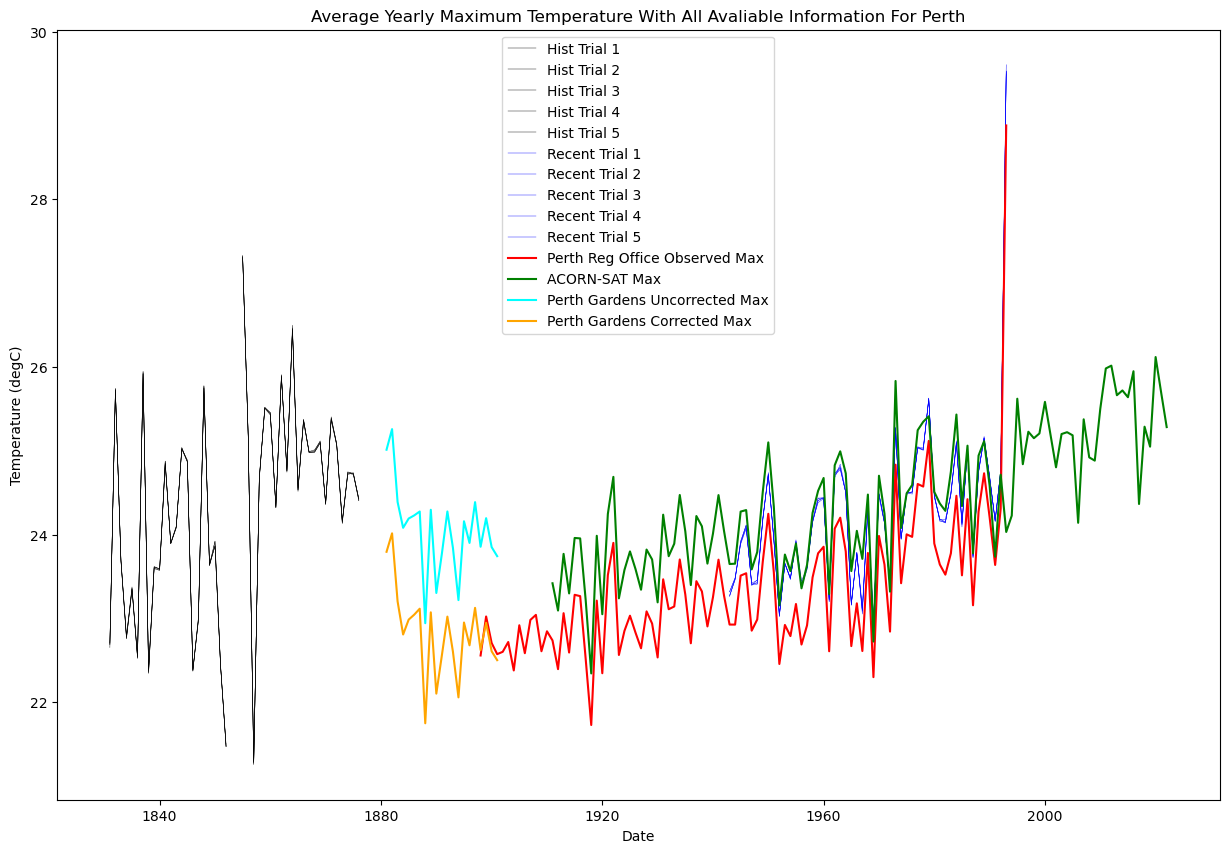

In [224]:
plt.figure(1,figsize= [15,10])
#Historical Estimation
plt.plot(HIST_1['Date'],HIST_1['Max Temp Estimation'],linewidth=0.3,label = 'Hist Trial 1',color = 'black')
plt.plot(HIST_2['Date'],HIST_2['Max Temp Estimation'],linewidth=0.3,label = 'Hist Trial 2',color = 'black')
plt.plot(HIST_3['Date'],HIST_3['Max Temp Estimation'],linewidth=0.3,label = 'Hist Trial 3',color = 'black')
plt.plot(HIST_4['Date'],HIST_4['Max Temp Estimation'],linewidth=0.3,label = 'Hist Trial 4',color = 'black')
plt.plot(HIST_5['Date'],HIST_5['Max Temp Estimation'],linewidth=0.3,label = 'Hist Trial 5',color = 'black')

#Current Estimation
plt.plot(PRO_1['Date'],PRO_1['Max Temp Estimation'],linewidth=0.3,label = 'Recent Trial 1',color = 'blue')
plt.plot(PRO_2['Date'],PRO_2['Max Temp Estimation'],linewidth=0.3,label = 'Recent Trial 2',color = 'blue')
plt.plot(PRO_3['Date'],PRO_3['Max Temp Estimation'],linewidth=0.3,label = 'Recent Trial 3',color = 'blue')
plt.plot(PRO_4['Date'],PRO_4['Max Temp Estimation'],linewidth=0.3,label = 'Recent Trial 4',color = 'blue')
plt.plot(PRO_5['Date'],PRO_5['Max Temp Estimation'],linewidth=0.3,label = 'Recent Trial 5',color = 'blue')

#PRO DE
plt.plot(PRO_DE_Y['date'],PRO_DE_Y['PRO Max'],linewidth=1.5,label = 'Perth Reg Office Observed Max',color = 'red')

#ACORN_SAT
plt.plot(ACORN_SAT_Y['date'],ACORN_SAT_Y['Max'],linewidth=1.5,label = 'ACORN-SAT Max',color = 'green')

#Perth Gardens
plt.plot(P_Gardens_Y['date'],P_Gardens_Y['tmax'],linewidth=1.5,label = 'Perth Gardens Uncorrected Max',color = 'cyan')

plt.plot(P_Gardens_CORR_Y['date'],P_Gardens_CORR_Y['tmax'],linewidth=1.5, label = 'Perth Gardens Corrected Max',color = 'orange')

plt.legend()

plt.ylabel('Temperature (degC)')
plt.xlabel('Date')
plt.title('Average Yearly Maximum Temperature With All Avaliable Information For Perth')


Text(0.5, 0, 'Date')

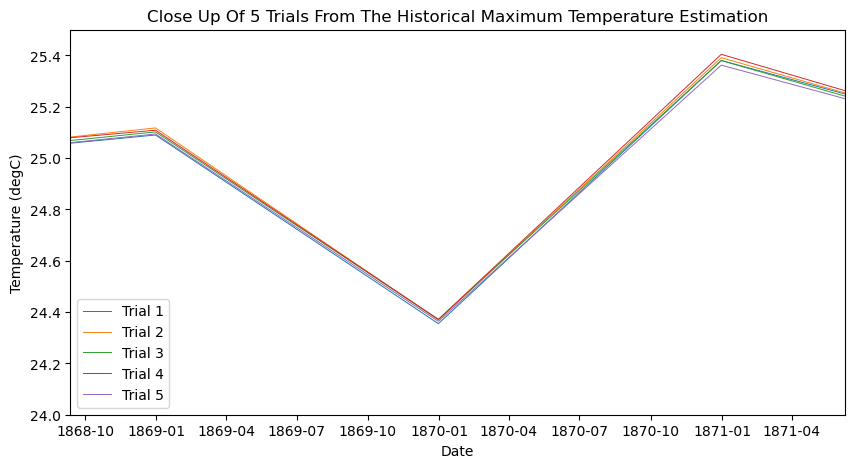

In [219]:
#Close up of what is happening
plt.figure(2,figsize= [10,5])
plt.plot(HIST_1['Date'],HIST_1['Max Temp Estimation'],linewidth=0.7,label = 'Trial 1')
plt.plot(HIST_2['Date'],HIST_2['Max Temp Estimation'],linewidth=0.7,label = 'Trial 2')
plt.plot(HIST_3['Date'],HIST_3['Max Temp Estimation'],linewidth=0.7,label = 'Trial 3')
plt.plot(HIST_4['Date'],HIST_4['Max Temp Estimation'],linewidth=0.7,label = 'Trial 4')
plt.plot(HIST_5['Date'],HIST_5['Max Temp Estimation'],linewidth=0.7,label = 'Trial 5')

plt.xlim(-37000,-36000) 
plt.ylim(24,25.5)
plt.legend()
plt.title('Close Up Of 5 Trials From The Historical Maximum Temperature Estimation')

plt.ylabel('Temperature (degC)')
plt.xlabel('Date')

In [238]:
PRO_EXT_COMP = PRO_EXT_COMP.get('Trial_1').set_index('Date')

<AxesSubplot:xlabel='Date'>

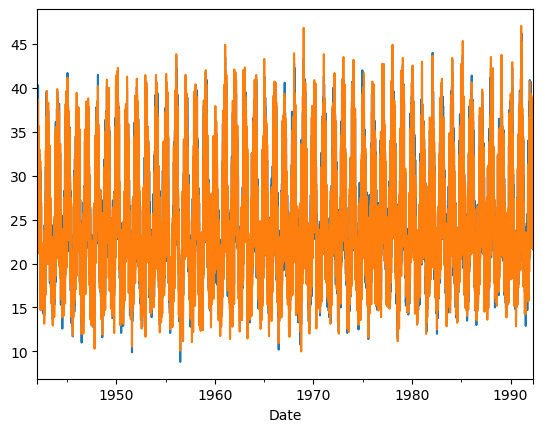

In [239]:
PRO_DE['PRO Max'].loc['1942-01-01':'1992-04-30'].plot()
PRO_EXT_COMP['Max Temp Estimation'].plot()




In [ ]:
Diff = PRO_DE['PRO Max'].loc['1942-01-01':'1992-04-30'] - PRO_EXT_COMP['Max Temp Estimation']

In [255]:
len(Diff[Diff>0])/len(Diff)

0.379589838437687

<AxesSubplot:>

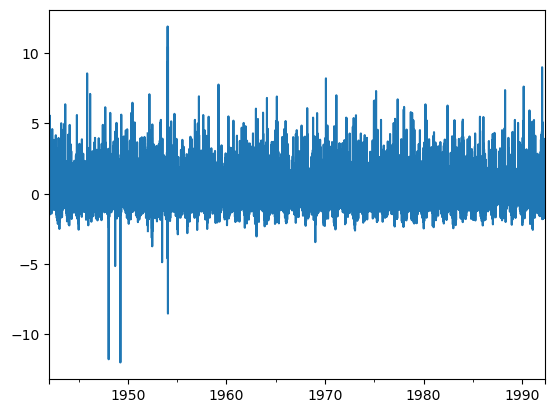

In [254]:
Diff.plot()

In [243]:
Diff[Diff<-10]

1948-01-18   -11.779930
1949-03-27   -12.008234
dtype: float64

In [244]:
DATE = '1954-01-02'
print("PRO Ext")
print(PRO_DE.loc[DATE])
print("PRO Sub")
print(PRO_Sub.loc[DATE])
print("PRO Estimated")
print(PRO_EXT_COMP['Max Temp Estimation'].loc[DATE])
print("PRO Diff Actual - Est")
print(Diff.loc[DATE])


PRO Ext
PRO Max    37.2
PRO Min    18.8
Name: 1954-01-02 00:00:00, dtype: float64
PRO Sub
date
1954-01-02 00:00:00    26.3
1954-01-02 03:00:00    23.2
1954-01-02 06:00:00    19.2
1954-01-02 09:00:00    24.4
1954-01-02 12:00:00    25.7
1954-01-02 15:00:00    25.1
1954-01-02 18:00:00    22.8
Name: temp, dtype: float64
PRO Estimated
27.860674452348224
PRO Diff Actual - Est
9.339325547651779


In [245]:
DATE = '1970-12-24'
print("PRO Ext")
print(PRO_DE.loc[DATE])
print("PRO Sub")
print(PRO_Sub.loc[DATE])
print("PRO Estimated")
print(PRO_EXT_COMP['Max Temp Estimation'].loc[DATE])
print("PRO Diff Actual - Est")
print(Diff.loc[DATE])


PRO Ext
PRO Max    22.8
PRO Min    20.8
Name: 1970-12-24 00:00:00, dtype: float64
PRO Sub
date
1970-12-24 00:00:00    28.9
1970-12-24 03:00:00    23.9
1970-12-24 06:00:00    21.3
1970-12-24 09:00:00    22.6
1970-12-24 12:00:00    21.2
1970-12-24 15:00:00    21.4
1970-12-24 18:00:00    18.9
1970-12-24 21:00:00    17.7
Name: temp, dtype: float64
PRO Estimated
22.632226532837525
PRO Diff Actual - Est
0.1677734671624762


In [246]:
DATE = '1949-03-27'
print("PRO Ext")
print(PRO_DE.loc[DATE])
print("PRO Sub")
print(PRO_Sub.loc[DATE])
print("PRO Estimated")
print(PRO_EXT_COMP['Max Temp Estimation'].loc[DATE])
print("PRO Diff Actual - Est")
print(Diff.loc[DATE])

PRO Ext
PRO Max    25.2
PRO Min    17.1
Name: 1949-03-27 00:00:00, dtype: float64
PRO Sub
date
1949-03-27 09:00:00    20.2
1949-03-27 12:00:00    23.5
1949-03-27 15:00:00    36.0
1949-03-27 18:00:00    21.7
Name: temp, dtype: float64
PRO Estimated
37.20823378531164
PRO Diff Actual - Est
-12.008233785311642


In [247]:
DATE = '1965-03-25'
print("PRO Ext")
print(PRO_DE.loc[DATE])
print("PRO Sub")
print(PRO_Sub.loc[DATE])
print("PRO Estimated")
print(PRO_EXT_COMP['Max Temp Estimation'].loc[DATE])
print("PRO Diff Actual - Est")
print(Diff.loc[DATE])

PRO Ext
PRO Max    24.2
PRO Min    21.2
Name: 1965-03-25 00:00:00, dtype: float64
PRO Sub
date
1965-03-25 00:00:00    28.9
1965-03-25 03:00:00    28.9
1965-03-25 06:00:00    22.8
1965-03-25 09:00:00    21.2
1965-03-25 12:00:00    20.2
1965-03-25 15:00:00    19.6
1965-03-25 18:00:00    20.6
1965-03-25 21:00:00    22.8
Name: temp, dtype: float64
PRO Estimated
21.301407579976793
PRO Diff Actual - Est
2.8985924200232063


In [248]:
DATE = '1982-12-09'
print("PRO Ext")
print(PRO_DE.loc[DATE])
print("PRO Sub")
print(PRO_Sub.loc[DATE])
print("PRO Estimated")
print(PRO_EXT_COMP['Max Temp Estimation'].loc[DATE])
print("PRO Diff Actual - Est")
print(Diff.loc[DATE])

PRO Ext
PRO Max    24.8
PRO Min    22.5
Name: 1982-12-09 00:00:00, dtype: float64
PRO Sub
date
1982-12-09 00:00:00    29.7
1982-12-09 03:00:00    29.4
1982-12-09 06:00:00    28.0
1982-12-09 09:00:00    22.6
1982-12-09 12:00:00    24.3
1982-12-09 15:00:00    24.0
1982-12-09 18:00:00    22.3
1982-12-09 21:00:00    18.6
Name: temp, dtype: float64
PRO Estimated
25.931637545383136
PRO Diff Actual - Est
-1.1316375453831355


In [1]:
'''
Recent_Sub_Data:
Sub-Daily Data that is split into its respective hourly data which has all the information in it.
'''
    
''' 
We now need to make sure that the subdaily matches the max and min
9+0 is the start of the day in focus
Max is found from
9+0, 10+0, 11+0, 12+0, 13+0, 14+0, 15+0, 16+0, 17+0, 18+0, 19+0, 20+0, 21+0, 22+0, 23+0, 0+1, 1+1, 2+1, 3+1, 4+1, 5+1, 6+1, 7+1, 8+1

Min is found from
9-1, 10-1, 11-1, 12-1, 13-1, 14-1, 15-1, 16-1, 17-1, 18-1, 19-1, 20-1, 21-1, 22-1, 23-1, 0+0, 1+0, 2+0, 3+0, 4+0, 5+0, 6+0, 7+0, 8+0 

#We label 9-1 as
PRO_Sub_0_N1
#We label 9+0 as
PRO_Sub_0_S
#We label 9+1 as
PRO_Sub_0_P1

'''    
    
    
    
    
#Lets shift it by 1 day but using the function



#HOUR 0: Get all data for HOUR 0 into a single frame
PRO_Sub_0 = pd.concat([Test[Test.index.hour==0]],axis =0)
#Make sure that the date is reset 
PRO_Sub_0 = PRO_Sub_0.reset_index()
#Set to datetime
PRO_Sub_0['date'] = pd.to_datetime(PRO_Sub_0['date']).dt.date

#Shift the temps forward and back 1 day this ensures that the data we have is for the max and min 9am temperatures
#Set Index back to date, but maybe not if we need to make it for Max and Min and rename the temp coloumn
PRO_Sub_0 = PRO_Sub_0.set_index('date').rename(columns={'temp':'hour 0'})
#Shift the date forward and backwards
#Forward a Day
#PRO_Sub_0_P1 = PRO_Sub_0.set_index('date').shift(1,axis=0).rename(columns={'temp':'hour 0+1'})
#Back a Day
#PRO_Sub_0_N1 = PRO_Sub_0.set_index('date').shift(-1,axis=0).rename(columns={'temp':'hour 0-1'})











#HOUR 1
PRO_Sub_1 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==1]],axis =0)
PRO_Sub_1 = PRO_Sub_1.reset_index()
PRO_Sub_1['date'] = pd.to_datetime(PRO_Sub_1['date']).dt.date
PRO_Sub_1 = PRO_Sub_1.set_index('date')














#HOUR 2
PRO_Sub_2 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==2]],axis =0)
PRO_Sub_2 = PRO_Sub_2.reset_index()
PRO_Sub_2['date'] = pd.to_datetime(PRO_Sub_2['date']).dt.date
PRO_Sub_2 = PRO_Sub_2.set_index('date')

#HOUR 3
PRO_Sub_3= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==3]],axis =0)
PRO_Sub_3 = PRO_Sub_3.reset_index()
PRO_Sub_3['date'] = pd.to_datetime(PRO_Sub_3['date']).dt.date
PRO_Sub_3 = PRO_Sub_3.set_index('date')

#HOUR 4
PRO_Sub_4 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==4]],axis =0)
PRO_Sub_4 = PRO_Sub_4.reset_index()
PRO_Sub_4['date'] = pd.to_datetime(PRO_Sub_4['date']).dt.date
PRO_Sub_4 = PRO_Sub_4.set_index('date')

#HOUR 5
PRO_Sub_5 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==5]],axis =0)
PRO_Sub_5 = PRO_Sub_5.reset_index()
PRO_Sub_5['date'] = pd.to_datetime(PRO_Sub_5['date']).dt.date
PRO_Sub_5 = PRO_Sub_5.set_index('date')

#HOUR 6
PRO_Sub_6= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==6]],axis =0)
PRO_Sub_6 = PRO_Sub_6.reset_index()
PRO_Sub_6['date'] = pd.to_datetime(PRO_Sub_6['date']).dt.date
PRO_Sub_6 = PRO_Sub_6.set_index('date')

#HOUR 7
PRO_Sub_7 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==7]],axis =0)
PRO_Sub_7 = PRO_Sub_7.reset_index()
PRO_Sub_7['date'] = pd.to_datetime(PRO_Sub_7['date']).dt.date
PRO_Sub_7 = PRO_Sub_7.set_index('date')

#HOUR 8
PRO_Sub_8 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==8]],axis =0)
PRO_Sub_8 = PRO_Sub_8.reset_index()
PRO_Sub_8['date'] = pd.to_datetime(PRO_Sub_8['date']).dt.date
PRO_Sub_8 = PRO_Sub_8.set_index('date') 

#HOUR 9
PRO_Sub_9= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==9]],axis =0)
PRO_Sub_9 = PRO_Sub_9.reset_index()
PRO_Sub_9['date'] = pd.to_datetime(PRO_Sub_9['date']).dt.date
PRO_Sub_9 = PRO_Sub_9.set_index('date')


#HOUR 10
PRO_Sub_10 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==10]],axis =0)
PRO_Sub_10 = PRO_Sub_10.reset_index()
PRO_Sub_10['date'] = pd.to_datetime(PRO_Sub_10['date']).dt.date
PRO_Sub_10 = PRO_Sub_10.set_index('date')

#HOUR 11
PRO_Sub_11 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==11]],axis =0)
PRO_Sub_11 = PRO_Sub_11.reset_index()
PRO_Sub_11['date'] = pd.to_datetime(PRO_Sub_11['date']).dt.date
PRO_Sub_11 = PRO_Sub_11.set_index('date')    

#HOUR 12
PRO_Sub_12= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==12]],axis =0)
PRO_Sub_12 = PRO_Sub_12.reset_index()
PRO_Sub_12['date'] = pd.to_datetime(PRO_Sub_12['date']).dt.date
PRO_Sub_12 = PRO_Sub_12.set_index('date')

#HOUR 13
PRO_Sub_13 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==13]],axis =0)
PRO_Sub_13 = PRO_Sub_13.reset_index()
PRO_Sub_13['date'] = pd.to_datetime(PRO_Sub_13['date']).dt.date
PRO_Sub_13 = PRO_Sub_13.set_index('date')

#HOUR 14
PRO_Sub_14 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==14]],axis =0)
PRO_Sub_14 = PRO_Sub_14.reset_index()
PRO_Sub_14['date'] = pd.to_datetime(PRO_Sub_14['date']).dt.date
PRO_Sub_14 = PRO_Sub_14.set_index('date')

#HOUR 15
PRO_Sub_15= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==15]],axis =0)
PRO_Sub_15 = PRO_Sub_15.reset_index()
PRO_Sub_15['date'] = pd.to_datetime(PRO_Sub_15['date']).dt.date
PRO_Sub_15 = PRO_Sub_15.set_index('date')

#HOUR 16
PRO_Sub_16 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==16]],axis =0)
PRO_Sub_16 = PRO_Sub_16.reset_index()
PRO_Sub_16['date'] = pd.to_datetime(PRO_Sub_16['date']).dt.date
PRO_Sub_16 = PRO_Sub_16.set_index('date')

#HOUR 17
PRO_Sub_17 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==17]],axis =0)
PRO_Sub_17 = PRO_Sub_17.reset_index()
PRO_Sub_17['date'] = pd.to_datetime(PRO_Sub_17['date']).dt.date
PRO_Sub_17 = PRO_Sub_17.set_index('date')

#HOUR 18
PRO_Sub_18= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==18]],axis =0)
PRO_Sub_18 = PRO_Sub_18.reset_index()
PRO_Sub_18['date'] = pd.to_datetime(PRO_Sub_18['date']).dt.date
PRO_Sub_18 = PRO_Sub_18.set_index('date')

#HOUR 19
PRO_Sub_19 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==19]],axis =0)
PRO_Sub_19 = PRO_Sub_19.reset_index()
PRO_Sub_19['date'] = pd.to_datetime(PRO_Sub_19['date']).dt.date
PRO_Sub_19 = PRO_Sub_19.set_index('date')

#HOUR 20
PRO_Sub_20 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==20]],axis =0)
PRO_Sub_20 = PRO_Sub_20.reset_index()
PRO_Sub_20['date'] = pd.to_datetime(PRO_Sub_20['date']).dt.date
PRO_Sub_20 = PRO_Sub_20.set_index('date')  

#HOUR 21
PRO_Sub_21= pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==21]],axis =0)
PRO_Sub_21 = PRO_Sub_21.reset_index()
PRO_Sub_21['date'] = pd.to_datetime(PRO_Sub_21['date']).dt.date
PRO_Sub_21 = PRO_Sub_21.set_index('date')

#HOUR 22
PRO_Sub_22 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==22]],axis =0)
PRO_Sub_22 = PRO_Sub_22.reset_index()
PRO_Sub_22['date'] = pd.to_datetime(PRO_Sub_22['date']).dt.date
PRO_Sub_22 = PRO_Sub_22.set_index('date')

#HOUR 23
PRO_Sub_23 = pd.concat([PRO_Sub_ES[PRO_Sub_ES.index.hour==23]],axis =0)
PRO_Sub_23 = PRO_Sub_23.reset_index()
PRO_Sub_23['date'] = pd.to_datetime(PRO_Sub_23['date']).dt.date
PRO_Sub_23 = PRO_Sub_23.set_index('date')

    











 '''
PRO_Sub_0_Max = PRO_Sub_0.shift(1,freq='D')
PRO_Sub_1_Max = PRO_Sub_1.shift(1,freq='D')
PRO_Sub_2_Max =PRO_Sub_2.shift(1,freq='D')
PRO_Sub_3_Max =PRO_Sub_3.shift(1,freq='D')
PRO_Sub_4_Max = PRO_Sub_4.shift(1,freq='D')
PRO_Sub_5_Max =PRO_Sub_5.shift(1,freq='D')
PRO_Sub_6_Max =PRO_Sub_6.shift(1,freq='D')
PRO_Sub_7_Max =PRO_Sub_7.shift(1,freq='D')
PRO_Sub_8_Max =PRO_Sub_8.shift(1,freq='D')
    
PRO_Sub_9_Min = PRO_Sub_9.shift(-1,freq='D')
PRO_Sub_10_Min = PRO_Sub_10.shift(1,freq='D')
PRO_Sub_11_Min =PRO_Sub_11.shift(1,freq='D')
PRO_Sub_12_Min =PRO_Sub_12.shift(1,freq='D')
PRO_Sub_13_Min = PRO_Sub_13.shift(1,freq='D')
PRO_Sub_14_Min =PRO_Sub_14.shift(1,freq='D')
PRO_Sub_15_Min =PRO_Sub_15.shift(1,freq='D')
PRO_Sub_16_Min =PRO_Sub_16.shift(1,freq='D')
PRO_Sub_17_Min =PRO_Sub_17.shift(1,freq='D')
PRO_Sub_18_Min = PRO_Sub_18.shift(1,freq='D')
PRO_Sub_19_Min = PRO_Sub_19.shift(1,freq='D')
PRO_Sub_20_Min =PRO_Sub_20.shift(1,freq='D')
PRO_Sub_21_Min =PRO_Sub_21.shift(1,freq='D')
PRO_Sub_22_Min = PRO_Sub_22.shift(1,freq='D')
PRO_Sub_23_Min =PRO_Sub_23.shift(1,freq='D')
'''
      


























    
    
    
    #Rename the columns
    PRO_Sub_0 = PRO_Sub_0.rename(columns={'temp':'hour 0'})
    PRO_Sub_1 = PRO_Sub_1.rename(columns={'temp':'hour 1'})
    PRO_Sub_2 = PRO_Sub_2.rename(columns={'temp':'hour 2'})
    PRO_Sub_3 = PRO_Sub_3.rename(columns={'temp':'hour 3'})
    PRO_Sub_4 = PRO_Sub_4.rename(columns={'temp':'hour 4'})
    PRO_Sub_5 = PRO_Sub_5.rename(columns={'temp':'hour 5'})
    PRO_Sub_6 = PRO_Sub_6.rename(columns={'temp':'hour 6'})
    PRO_Sub_7 = PRO_Sub_7.rename(columns={'temp':'hour 7'})
    PRO_Sub_8 = PRO_Sub_8.rename(columns={'temp':'hour 8'})
    PRO_Sub_9 = PRO_Sub_9.rename(columns={'temp':'hour 9'})
    PRO_Sub_10= PRO_Sub_10.rename(columns={'temp':'hour 10'})
    PRO_Sub_11 = PRO_Sub_11.rename(columns={'temp':'hour 11'})
    PRO_Sub_12 = PRO_Sub_12.rename(columns={'temp':'hour 12'})
    PRO_Sub_13 = PRO_Sub_13.rename(columns={'temp':'hour 13'})
    PRO_Sub_14 = PRO_Sub_14.rename(columns={'temp':'hour 14'})
    PRO_Sub_15 = PRO_Sub_15.rename(columns={'temp':'hour 15'})
    PRO_Sub_16 = PRO_Sub_16.rename(columns={'temp':'hour 16'})
    PRO_Sub_17 = PRO_Sub_17.rename(columns={'temp':'hour 17'})
    PRO_Sub_18= PRO_Sub_18.rename(columns={'temp':'hour 18'})
    PRO_Sub_19 = PRO_Sub_19.rename(columns={'temp':'hour 19'})
    PRO_Sub_20 = PRO_Sub_20.rename(columns={'temp':'hour 20'})
    PRO_Sub_21 = PRO_Sub_21.rename(columns={'temp':'hour 21'})
    PRO_Sub_22= PRO_Sub_22.rename(columns={'temp':'hour 22'})
    PRO_Sub_23 = PRO_Sub_23.rename(columns={'temp':'hour 23'})
    
    
    #Merge the data together
    #First Merge
    PR01 = pd.merge(PRO_Sub_0,PRO_Sub_1, on = ['date'], how  = 'left')
    PR23 = pd.merge(PRO_Sub_2,PRO_Sub_3, on = ['date'], how  = 'right')
    PR45 = pd.merge(PRO_Sub_4,PRO_Sub_5, on = ['date'], how  = 'right')
    PR67 = pd.merge(PRO_Sub_6,PRO_Sub_7, on = ['date'], how  = 'left')
    PR89 = pd.merge(PRO_Sub_8,PRO_Sub_9, on = ['date'], how  = 'right')
    PR1011 =pd.merge(PRO_Sub_10,PRO_Sub_11, on = ['date'], how  = 'right')
    PR1213 =pd.merge(PRO_Sub_12,PRO_Sub_13, on = ['date'], how  = 'left')
    PR1415 = pd.merge(PRO_Sub_14,PRO_Sub_15, on = ['date'], how  = 'right')
    PR1617 = pd.merge(PRO_Sub_16,PRO_Sub_17, on = ['date'], how  = 'right')
    PR1819 =pd.merge(PRO_Sub_18,PRO_Sub_19, on = ['date'], how  = 'left')
    PR2021 =pd.merge(PRO_Sub_20,PRO_Sub_21, on = ['date'], how  = 'right')
    PR2223 =pd.merge(PRO_Sub_22,PRO_Sub_23, on = ['date'], how  = 'right')

    #Second Merge
    PR0123 = pd.merge(PR01,PR23, on = ['date'], how  = 'left')
    PR4567 = pd.merge(PR45,PR67, on = ['date'], how  = 'right')
    PR891011 = pd.merge(PR89,PR1011, on = ['date'], how  = 'left')
    PR12131415 = pd.merge(PR1213,PR1415, on = ['date'], how  = 'left')
    PR16171819 = pd.merge(PR1617,PR1819, on = ['date'], how  = 'right')
    PR20212223 = pd.merge(PR2021,PR2223, on = ['date'], how  = 'left')

    #Third Merge
    PR_1 = pd.merge(PR0123,PR4567, on = ['date'], how  = 'left')
    PR_2 = pd.merge(PR891011,PR12131415, on = ['date'], how  = 'left')
    PR_3 = pd.merge(PR16171819,PR20212223, on = ['date'], how  = 'left')

    #Fourth Merge
    PR_L =  pd.merge(PR_1,PR_2, on = ['date'], how  = 'left')

    #Fifth Merge
    PR_FULL_MATRIX =  pd.merge(PR_L,PR_3, on = ['date'], how  = 'left')

    #Clean Data Up
    PR_FULL_MATRIX = PR_FULL_MATRIX.reset_index()
    PR_FULL_MATRIX['date'] = pd.to_datetime(PR_FULL_MATRIX['date'])
    PR_FULL_MATRIX = PR_FULL_MATRIX.set_index('date')

IndentationError: unexpected indent (4143462323.py, line 127)

In [13]:
Test = PRO_Sub_ES

In [27]:
Test = Test.loc['1980-01-01':'1980-05-05']
Test

date
1980-01-01 00:00:00    26.4
1980-01-01 03:00:00    25.2
1980-01-01 06:00:00    23.2
1980-01-01 09:00:00    26.1
1980-01-01 12:00:00    34.1
                       ... 
1980-05-05 09:00:00    16.7
1980-05-05 12:00:00    19.0
1980-05-05 15:00:00    20.0
1980-05-05 18:00:00    18.7
1980-05-05 21:00:00    17.8
Name: temp, Length: 1008, dtype: float64

In [36]:
PRO_Sub_0_S

,hour 0+0
date,
1980-01-01,26.4
1980-01-02,24.2
1980-01-03,23.0
1980-01-04,25.1
1980-01-05,26.4
...,...
1980-05-01,16.8
1980-05-02,18.4
1980-05-03,20.7


In [38]:
PRO_Sub_0_N1

,hour 0-1
date,
1980-01-01,24.2
1980-01-02,23.0
1980-01-03,25.1
1980-01-04,26.4
1980-01-05,25.3
...,...
1980-05-01,18.4
1980-05-02,20.7
1980-05-03,17.2
